In [77]:
#preprocessing images
import tensorflow as tf
from tensorflow.keras import layers, models,preprocessing,regularizers,callbacks
from matplotlib import pyplot as plt

In [64]:
import os
from PIL import Image
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm


In [65]:
gn=models.googlenet(pretrained=True)
#importing GoogleNet from models in torch vision  

img=transforms.ToTensor()

df = pd.DataFrame(columns=list(range(1000)))
target=pd.DataFrame(columns=['target'])
#getting the labels

In [66]:
for i in os.listdir('datasets/final_image_data'):
  for j in os.listdir('datasets/final_image_data/'+i):
    for k in os.listdir('datasets/final_image_data/'+i+'/'+j):
      im=Image.open('datasets/final_image_data/'+i+'/'+j+'/'+k)
      features=gn.forward(torch.autograd.Variable(img(im)).unsqueeze(0)).cpu().detach().numpy()
      df=df.append(pd.DataFrame(features),ignore_index=True)
      target=target.append(pd.DataFrame([{'target':1 if j =='dep' else 0}])) 
      print('datasets/final_image_data/'+i+'/'+j+'/'+k)
#creating a feture vectors by feeding images to the GoogleNet  

datasets/final_image_data/test/dep/414_AUDIO.png
datasets/final_image_data/test/dep/421_AUDIO.png
datasets/final_image_data/test/dep/426_AUDIO.png
datasets/final_image_data/test/dep/433_AUDIO.png
datasets/final_image_data/test/dep/441_AUDIO.png
datasets/final_image_data/test/dep/448_AUDIO.png
datasets/final_image_data/test/dep/453_AUDIO.png
datasets/final_image_data/test/dep/459_AUDIO.png
datasets/final_image_data/test/dep/461_AUDIO.png
datasets/final_image_data/test/dep/483_AUDIO.png
datasets/final_image_data/test/nodep/475_AUDIO.png
datasets/final_image_data/test/nodep/476_AUDIO.png
datasets/final_image_data/test/nodep/477_AUDIO.png
datasets/final_image_data/test/nodep/478_AUDIO.png
datasets/final_image_data/test/nodep/479_AUDIO.png
datasets/final_image_data/test/nodep/480_AUDIO.png
datasets/final_image_data/test/nodep/481_AUDIO.png
datasets/final_image_data/test/nodep/482_AUDIO.png
datasets/final_image_data/test/nodep/485_AUDIO.png
datasets/final_image_data/test/nodep/486_AUDIO.png


In [67]:
df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.306654,-0.633406,-0.151256,-0.532530,-0.651624,-0.227094,0.015982,-0.244216,-0.046522,-0.118106,...,-0.741757,-0.101521,-0.327428,0.206987,-0.389608,-0.150541,-0.002269,-0.256435,0.139070,0.417565
1,0.385642,-0.095607,0.103956,0.619983,-0.116110,0.120493,-0.172011,-0.117590,-0.837543,-0.543298,...,0.168197,-0.684402,-0.198198,-0.493900,-0.772365,-0.275379,0.021237,-0.355018,-0.070097,0.439719
2,-0.052046,-0.100145,-0.105331,-0.365683,-0.129338,-0.154497,-0.499956,0.937800,0.945682,0.249450,...,-0.415072,-0.753472,-0.612137,-0.375044,-0.789917,-0.686755,-0.263383,-0.561875,0.321057,-0.314965
3,0.141066,0.360730,0.175870,-0.072175,0.277038,-0.064358,0.305524,0.127920,-0.647614,-1.123792,...,-0.910021,0.168537,-0.523617,-0.544128,-0.536078,-0.659539,-0.321719,-0.572723,0.636828,0.307228
4,-0.663744,-0.337020,-0.541360,-0.522560,0.058624,-0.081463,-0.325737,-0.146122,0.628111,-0.790678,...,0.476092,0.431549,-0.164822,-0.088856,-0.329696,0.025875,0.244842,0.565601,-0.050964,-0.228632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.347152,0.086624,-0.041848,0.046804,-0.154956,-0.019889,-0.078283,0.367827,-0.152805,-0.026657,...,-0.846478,-0.174397,-0.470390,-0.371743,0.249190,-0.751544,-0.449751,0.201836,-0.399007,0.317070
80,-0.247197,-0.266537,-0.263403,-0.665460,-0.091672,0.466226,0.051188,-0.522759,0.443708,-0.318528,...,-0.584355,0.347946,-0.287425,-0.223305,0.051773,-0.401548,0.205222,0.541736,-0.076971,0.454045
81,-0.408361,-0.712971,-1.180355,-0.130841,-0.512783,-0.238306,-0.038742,-0.172874,0.003263,-0.266935,...,-0.378287,0.439095,0.552892,0.121100,-0.307569,-0.310233,0.063071,0.260754,0.225654,0.348898
82,0.032382,-0.115985,-0.410795,-0.258337,-0.320104,-0.307804,-0.284795,0.550922,0.075365,-0.414363,...,-0.309596,-0.224218,-0.419643,-0.134187,0.111918,-0.842307,-0.197196,-0.216380,-0.527232,-0.533102


In [71]:
target

,target
0,1
0,1
0,1
0,1
0,1
...,...
0,0
0,0
0,0
0,0


In [72]:
target.shape[0] == df.shape[0]

True

In [73]:
target = target.astype('int').copy()

In [74]:
x_train,x_test,y_train,y_test=train_test_split(df,target['target'],train_size=0.8)
#test-train split

In [75]:
x_train.shape

(67, 1000)

In [87]:
# model
model = models.Sequential()
model.add(layers.Dense(256, activation='linear',kernel_regularizer=regularizers.l2(0.01),input_shape=(1000,)))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.8))
model.add(layers.experimental.RandomFourierFeatures(output_dim=2048,scale=10,kernel_initializer='gaussian'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.hinge,
              metrics=['accuracy',
                       tf.keras.metrics.TrueNegatives(),
                       tf.keras.metrics.TruePositives(),
                       tf.keras.metrics.FalseNegatives(),
                       tf.keras.metrics.FalsePositives()])

Epoch 1/50
3/3 [==============================] - 4s 679ms/step - loss: 5.1110 - accuracy: 0.4925 - true_negatives_2: 17.0000 - true_positives_2: 16.0000 - false_negatives_2: 17.0000 - false_positives_2: 17.0000 - val_loss: 5.1001 - val_accuracy: 0.4706 - val_true_negatives_2: 8.0000 - val_true_positives_2: 0.0000e+00 - val_false_negatives_2: 9.0000 - val_false_positives_2: 0.0000e+00
Epoch 2/50
3/3 [==============================] - 0s 56ms/step - loss: 5.0959 - accuracy: 0.5522 - true_negatives_2: 19.0000 - true_positives_2: 18.0000 - false_negatives_2: 15.0000 - false_positives_2: 15.0000 - val_loss: 5.0954 - val_accuracy: 0.4706 - val_true_negatives_2: 8.0000 - val_true_positives_2: 0.0000e+00 - val_false_negatives_2: 9.0000 - val_false_positives_2: 0.0000e+00
Epoch 3/50
3/3 [==============================] - 0s 56ms/step - loss: 5.1321 - accuracy: 0.4776 - true_negatives_2: 17.0000 - true_positives_2: 15.0000 - false_negatives_2: 18.0000 - false_positives_2: 17.0000 - val_loss: 5.

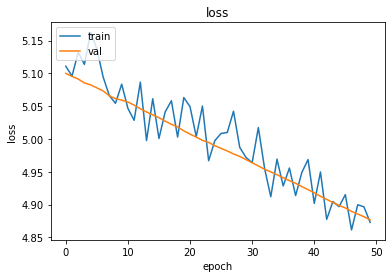

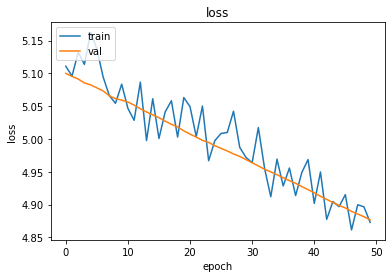

In [88]:
# fitiing
history=model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),shuffle=True,
                            callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)])
# using early stopping method to train the model to achieve maximum accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [89]:
#testing 
loss,accuracy,tn,tp,fn,fp=model.evaluate(x_test,y_test)
print(accuracy,tn,tp,fn,fp)

1/1 [==============================] - 0s 56ms/step - loss: 4.8767 - accuracy: 0.4706 - true_negatives_2: 8.0000 - true_positives_2: 0.0000e+00 - false_negatives_2: 9.0000 - false_positives_2: 0.0000e+00
0.47058823704719543 8.0 0.0 9.0 0.0
